In [15]:
!pip install pandasql
import pandas as pd
import pandasql as ps
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [16]:
matches = pd.read_csv('matches.csv', index_col =[0])
fighters = pd.read_csv('fighters.csv',index_col = [0])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
matches.head(5)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,...,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0,4,0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4,1,6.400000,4.000000,...,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27,742.60,3,0,2,4,2,0,0,8,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0,3,0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,12.3,10.200000,0.800000,0.000000,138.90,51.300000,0.399000,0.700000,1.00000,0.500000,0.225000,158.700000,69.600000,3,6,13.000000,9.300000,...,24.571429,14.142857,10.571429,7.857143,98.571429,32.571429,6.428571,4.285714,61.857143,12.428571,0.000000,29.142857,18.142857,1.142857,0.000000,115.571429,44.714286,0.437143,0.285714,3.285714,0.857143,0.147143,158.142857,82.285714,25,1062.00,2,0,1,2,0,2,0,5,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0,3,0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,3.806452,67.645161,23.258065,0.645161,14.0,12.193548,0.935484,0.096774,97.00,46.774194,0.496129,0.354839,2.16129,0.677419,0.295484,103.709677,52.548387,8,8,17.903226,11.870968,...,14.466667,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,0.266667,6.000000,4.400000,0.333333,0.133333,98.733333,35.733333,0.340000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600000,33,604.40,2,0,1,3,3,6,1,14,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0,4,0,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,13.000000,10.500000,116.250000,53.750000,0.500000,3.0,2.500000,0.500000,0.250000,136.25,70.250000,0.550000,0.250000,2.50000,1.250000,0.287500,154.750000,86.750000,4,0,12.250000,6.000000,...,20.250000,13.375000,6.875000,5.625000,103.125000,38.500000,0.875000,0.750000,77.375000,20.375000,0.125000,13.250000,11.125000,0.000000,0.000000,110.875000,44.875000,0.446250,0.000000,2.375000,0.000000,0.000000,115.125000,48.875000,20,690.25,0,0,1,4,1,0,0,6,Orthodox,162.56,172.72,135.0,26.0,29.0


## Fighter have highest Win streak in each weight_class

In [ ]:
ps.sqldf('''
SELECT R_fighter, max(R_longest_win_streak) as Highest_win_streak, weight_class
FROM matches
GROUP BY weight_class
ORDER BY Highest_win_streak DESC
''')

,R_fighter,Highest_win_streak,weight_class
0,Anderson Silva,16,Middleweight
1,Anderson Silva,15,Light Heavyweight
2,Demetrious Johnson,13,Flyweight
3,Max Holloway,13,Lightweight
4,Max Holloway,12,Featherweight
5,Georges St-Pierre,11,Welterweight
6,Royce Gracie,10,Catch Weight
7,Junior Dos Santos,9,Heavyweight
8,Royce Gracie,9,Open Weight
9,Joanna Jedrzejczyk,8,Women's Strawweight


## Top 5 Fighter have the most number of Title bouts

In [ ]:
#
ps.sqldf('''
WITH lis AS
(
SELECT *
FROM
(
SELECT B_fighter as Fighter, Max(B_total_title_bouts) as Total_title_bouts
FROM matches
GROUP BY Fighter
ORDER BY Total_title_bouts DESC
)
UNION ALL

SELECT *
FROM
(
SELECT R_fighter as Fighter, Max(R_total_title_bouts) as Total_title_bouts
FROM matches
GROUP BY Fighter
ORDER BY Total_title_bouts DESC
)
)
SELECT Fighter, max(Total_title_bouts) as Total_title_bouts FROM lis
GROUP BY Fighter
ORDER BY Total_title_bouts DESC
LIMIT 5
''')

,Fighter,Total_title_bouts
0,Randy Couture,16
1,Georges St-Pierre,14
2,Anderson Silva,13
3,Demetrious Johnson,13
4,Jon Jones,12


## Explore Anderson Silva data

In [ ]:
matches[(matches['B_fighter'] == 'Anderson Silva')][['B_fighter','B_Stance','B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous','B_win_by_KO/TKO','B_win_by_Submission','B_win_by_TKO_Doctor_Stoppage']]

In [ ]:
matches[(matches['R_fighter'] == 'Anderson Silva')][['R_fighter','R_Stance','R_win_by_Decision_Majority','R_win_by_Decision_Split','R_win_by_Decision_Unanimous','R_win_by_KO/TKO','R_win_by_Submission','R_win_by_TKO_Doctor_Stoppage']]

In [ ]:
A_Silva = matches[(matches['B_fighter'] == 'Anderson Silva') | (matches['R_fighter'] == 'Anderson Silva')].sort_values(by='date',ascending=False)
A_Silva[['B_fighter','B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous','B_win_by_KO/TKO','B_win_by_Submission','B_win_by_TKO_Doctor_Stoppage']].iloc[0]

In [ ]:
Randy = matches[(matches['B_fighter'] == 'Randy Couture') | (matches['R_fighter'] == 'Randy Couture')].sort_values(by='date',ascending=False)
Randy

## Winrate by color

Text(0, 0.5, '')

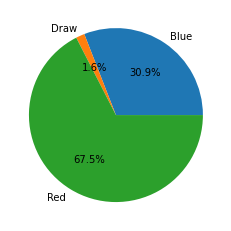

In [ ]:
matches_color = matches[['B_fighter','R_fighter','Winner']]
matches.groupby('Winner')['R_fighter'].count().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
# matches_color['Win_rate'] = matches_color.apply(win_rate_bycolor,axis=1)
# matches_age['Win_rate'].mean()

In [ ]:
matches_color = matches[['B_fighter','R_fighter','Winner']]
def win_rate_bycolor(row):
    if row['Winner'] == 'Red':
        return 1
    else:
        return 0
matches_color['Win_rate'] = matches_color.apply(win_rate_bycolor,axis=1)
matches_color['Win_rate'].mean()

In [ ]:
matches['date'] = pd.to_datetime(matches['date'])

In [ ]:
matches_year = matches
matches_year['Year'] = matches_year['date'].dt.year
matches_year.groupby('Year')['Winner'].apply(lambda x: x.value_counts()).to_frame()

Winner
Year             
1993 Red        8
1994 Red       29
1995 Red       31
     Draw       2
1996 Red       36
1997 Red       38
     Draw       1
1998 Red       20
1999 Red       41
     Draw       2
2000 Red       40
     Draw       1
2001 Red       39
     Draw       1
2002 Red       52
     Draw       1
2003 Red       39
     Draw       2
2004 Red       39
2005 Red       79
     Draw       1
2006 Red      158
2007 Red      169
     Draw       2
2008 Red      201
2009 Red      213
     Draw       2
2010 Red      153
     Blue      97
     Draw       3
2011 Red      176
     Blue     119
     Draw       5
2012 Red      208
     Blue     125
     Draw       8
2013 Red      223
     Blue     153
     Draw      10
2014 Red      312
     Blue     182
     Draw       9
2015 Red      265
     Blue     199
     Draw       9
2016 Red      286
     Blue     197
     Draw      10
2017 Red      245
     Blue     195
     Draw      11
2018 Red      254
     Blue     217
     Draw       3
2019 Red      116
     Blue     107

## Winning rate with Age

In [ ]:
matches_age = matches[['B_fighter','B_age','R_fighter','R_age','Winner']].dropna()

In [ ]:
def win_rate_byage(row):
    if (row['B_age'] != None) or (row['R_age'] != None):
        if (row['B_age'] < row['R_age']) and (row['Winner'] == 'Blue'):
            return 1
        elif (row['R_age'] < row['B_age']) and (row['Winner'] == 'Red'):
            return 1
        else:
            return 0
matches_age['Win_rate'] = matches_age.apply(win_rate_byage,axis=1)
matches_age['Win_rate'].mean()*100

51.18881118881119

In [ ]:
matches_age.groupby('Win_rate').count()['Winner']

Win_rate
0    2443
1    2562
Name: Winner, dtype: int64

## Reach

In [ ]:
matches_reach = matches[['B_fighter','B_Reach_cms','R_fighter','R_Reach_cms','Winner']]
def win_rate_byreach(row):
    if (row['R_Reach_cms'] != None) or (row['B_Reach_cms'] != None):
        if (row['B_Reach_cms'] >= row['R_Reach_cms']) and (row['Winner'] == 'Blue'):
            return 1
        elif (row['R_Reach_cms'] >= row['B_Reach_cms']) and (row['Winner'] == 'Red'):
            return 1
        else:
            return 0
matches_reach['Win_rate'] = matches_reach.apply(win_rate_byreach,axis=1)
matches_reach['Win_rate'].mean()*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


49.650077760497666

Text(0, 0.5, '')

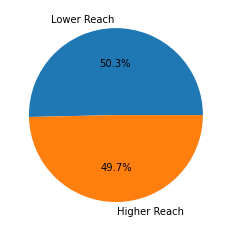

In [ ]:
matches_reach.groupby('Win_rate').count()['Winner'].plot(kind='pie',autopct='%1.1f%%',labels=['Lower Reach','Higher Reach'])
plt.ylabel('')

## winrate with K.O

In [ ]:
matches_ko = matches[((matches['B_win_by_KO/TKO'] - matches['R_win_by_KO/TKO']) >=2) | ((matches['R_win_by_KO/TKO'] - matches['B_win_by_KO/TKO']) >=2)][['B_fighter','B_win_by_KO/TKO','R_fighter','R_win_by_KO/TKO','Winner']]
def win_rate_byko(row):
    if (row['R_win_by_KO/TKO'] != None) or (row['B_win_by_KO/TKO'] != None):
        if (row['R_win_by_KO/TKO'] < row['B_win_by_KO/TKO']) and (row['Winner'] == 'Blue'):
            return 1
        elif (row['B_win_by_KO/TKO'] < row['R_win_by_KO/TKO']) and (row['Winner'] == 'Red'):
            return 1
        else:
            return 0
matches_ko['Win_rate'] = matches_ko.apply(win_rate_byko,axis=1)
matches_ko['Win_rate'].mean()*100

52.25424981522543

In [ ]:
matches_ko.groupby('Win_rate').count()['Winner'].plot(kind='pie',autopct='%1.1f%%',labels=['Lower No. KO','Higher No. KO'])
plt.ylabel('')

Win_rate
0    646
1    707
Name: Winner, dtype: int64

## Winning rate with stance

In [ ]:
matches_stance = matches[((matches['R_Stance'] == 'Southpaw') & (matches['B_Stance'] != 'Southpaw')) | ((matches['B_Stance'] == 'Southpaw') & (matches['R_Stance'] != 'Southpaw'))][['B_fighter','B_Stance','R_fighter','R_Stance','Winner']].dropna()
def win_rate_bystance(row):
    if (row['R_Stance'] == 'Southpaw') and (row['Winner'] == 'Red'):
        return 1
    elif (row['B_Stance'] == 'Southpaw') and (row['Winner'] == 'Blue'):
        return 1
    else:
        return 0
matches_stance['Win_rate'] = matches_stance.apply(win_rate_bystance,axis=1)
matches_stance['Win_rate'].mean()*100

52.84128020901372

In [ ]:
matches_stance.groupby('Win_rate').count()['Winner']

Win_rate
0    722
1    809
Name: Winner, dtype: int64

## Strike Accuracy

In [ ]:
matches_strike = matches[['B_fighter','B_avg_SIG_STR_pct','R_fighter','R_avg_SIG_STR_pct','Winner']].dropna()
def win_rate_byaccuracy(row):
    if (row['B_avg_SIG_STR_pct'] > row['R_avg_SIG_STR_pct']) & (row['Winner'] == 'Blue'):
        return 1
    elif (row['R_avg_SIG_STR_pct'] > row['B_avg_SIG_STR_pct']) & (row['Winner'] == 'Red'):
        return 1
    else:
        return 0
matches_strike['Win_rate'] = matches_strike.apply(win_rate_byaccuracy,axis=1)
matches_strike['Win_rate'].mean()*100

51.50767543859649

In [ ]:
matches_strike.groupby('Win_rate').count()['Winner']

Win_rate
0    1769
1    1879
Name: Winner, dtype: int64

## Winning rate with Takedown

In [ ]:
matches_td = matches[['B_fighter','B_avg_TD_pct','R_fighter','R_avg_TD_pct','Winner']].dropna()
def win_rate_bytd(row):
    if (row['B_avg_TD_pct'] > row['R_avg_TD_pct']) & (row['Winner'] == 'Blue'):
        return 1
    elif (row['R_avg_TD_pct'] > row['B_avg_TD_pct']) & (row['Winner'] == 'Red'):
        return 1
    else:
        return 0
matches_td['Win_rate'] = matches_td.apply(win_rate_bytd,axis=1)
matches_td['Win_rate'].mean()*100

49.72587719298245

In [ ]:
matches_td.groupby('Win_rate').count()['Winner']

Win_rate
0    1834
1    1814
Name: Winner, dtype: int64

## Winning rate with fighter older than 32

In [ ]:
matches_age32 = matches[((matches['B_age'] > 32) & (matches['R_age'] <=32)) | ((matches['R_age'] > 32) & (matches['B_age'] <=32))][['B_fighter','B_age','R_fighter','R_age','Winner']].dropna()
def win_rate_by32(row):
    if (row['B_age'] > row['R_age']) & (row['Winner'] == 'Red'):
        return 1
    elif (row['R_age'] > row['B_age']) & (row['Winner'] == 'Blue'):
        return 1
    else:
        return 0
matches_age32['Win_rate'] = matches_age32.apply(win_rate_by32,axis=1)
matches_age32['Win_rate'].mean()*100

59.61410512308716

Text(0, 0.5, '')

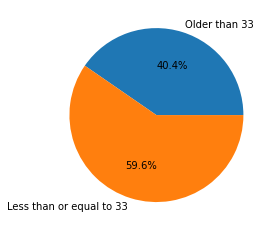

In [ ]:
matches_age32.groupby('Win_rate').count()['Winner'].plot(kind='pie',autopct='%1.1f%%',labels=['Older than 33','Less than or equal to 33'])
plt.ylabel('')

## Độ tuổi có số trận thắng cao

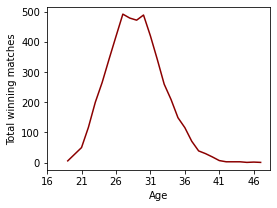

In [ ]:
matches_age1 = matches[matches['Winner'] == 'Red'][['R_fighter','R_age']]
matches_age2 = matches[matches['Winner'] == 'Blue'][['B_fighter','B_age']]
matches_age2.columns=['Fighter','Age']
matches_age1.columns=['Fighter','Age']
matches_ages = pd.concat((matches_age2,matches_age1),axis=0)
matches_ages.groupby('Age').count()['Fighter'].reset_index().sort_values(by='Age').set_index('Age').squeeze().plot(figsize=(4,3),color='darkred')
plt.xticks(range(16, 50,5))
plt.ylabel('Total winning matches')
plt.show()

## Độ tuổi có nhiều trận thắng của Nữ

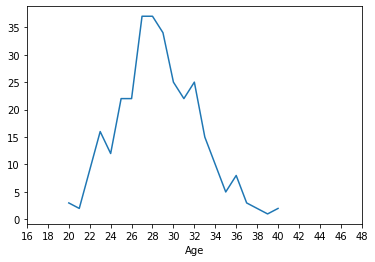

In [ ]:
matches_age1 = matches[(matches['Winner'] == 'Red') & (matches['weight_class'].str.contains('Women'))][['R_fighter','R_age']]
matches_age2 = matches[(matches['Winner'] == 'Blue') & (matches['weight_class'].str.contains('Women'))][['B_fighter','B_age']]
matches_age2.columns=['Fighter','Age']
matches_age1.columns=['Fighter','Age']
matches_ages = pd.concat((matches_age2,matches_age1),axis=0)
matches_ages.groupby('Age').count()['Fighter'].reset_index().sort_values(by='Age').set_index('Age').squeeze().plot()
plt.xticks(range(16, 50,5))
plt.show()

In [ ]:
matches.sample()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,...,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
1390,Michel Prazeres,JC Cottrell,Robert Madrigal,2016-07-23,"Chicago, Illinois, USA",Red,False,Lightweight,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,...,14.0,10.4,9.4,7.6,83.0,29.0,9.8,6.0,80.8,24.8,0.0,7.4,7.4,1.8,0.0,102.2,42.6,0.42,0.6,2.0,1.4,0.46,134.0,71.4,15,900.0,0,0,2,1,0,0,0,3,Orthodox,167.64,170.18,170.0,26.0,34.0


## Winning rate with W/L

In [ ]:
matches_wl = matches[(((matches['R_wins'] + matches['R_losses'] + matches['R_draw']) >=10) & ((matches['B_wins'] + matches['B_losses'] + matches['B_draw']) >=10))][['B_fighter','B_wins','B_losses','R_fighter','R_wins','R_losses','Winner']].dropna()
def win_rate_bywl(row):
    if (row['B_wins']/(row['B_wins'] + row['B_losses']) > (row['R_wins']/(row['R_wins'] + row['R_losses']))) & (row['Winner'] == 'Blue'):
        return 1
    elif (row['B_wins']/(row['B_wins'] + row['B_losses']) < (row['R_wins']/(row['R_wins'] + row['R_losses']))) & (row['Winner'] == 'Red'):
        return 1
    else:
        return 0
matches_wl['Win_rate'] = matches_wl.apply(win_rate_bywl,axis=1)
matches_wl['Win_rate'].mean()*100

52.84810126582279

In [ ]:
matches_wl.groupby('Win_rate').count()['Winner']

Win_rate
0    149
1    167
Name: Winner, dtype: int64

In [ ]:
matches_wl = matches[(((matches['R_wins'] + matches['R_losses'] + matches['R_draw']) >=10) & ((matches['B_wins'] + matches['B_losses'] + matches['B_draw']) >=10))][['B_fighter','B_wins','B_losses','R_fighter','R_wins','R_losses','Winner']].dropna()
def win_rate_bywl(row):
    if row['R_losses'] != row['B_losses']:
        if (row['B_losses'] < row['R_losses']) & (row['Winner'] == 'Blue'):
            return 1
        elif (row['R_losses'] < row['B_losses']) & (row['Winner'] == 'Red'):
            return 1
        else:
            return 0
matches_wl['Win_rate'] = matches_wl.apply(win_rate_bywl,axis=1)
matches_wl#['Win_rate'].mean()*100

,B_fighter,B_wins,B_losses,R_fighter,R_wins,R_losses,Winner,Win_rate
2,Donald Cerrone,23,8,Tony Ferguson,14,1,Red,1.0
6,Pedro Munhoz,8,4,Aljamain Sterling,9,3,Red,1.0
13,Anthony Smith,7,4,Alexander Gustafsson,10,5,Blue,1.0
25,Kevin Lee,10,4,Rafael Dos Anjos,17,9,Red,0.0
29,Nik Lentz,14,8,Charles Oliveira,14,9,Red,0.0
...,...,...,...,...,...,...,...,...
4696,Randy Couture,10,3,Chuck Liddell,10,2,Red,1.0
4713,Vitor Belfort,7,3,Tito Ortiz,10,4,Red,0.0
4745,Tito Ortiz,9,3,Chuck Liddell,8,2,Red,1.0
4769,Tito Ortiz,9,2,Randy Couture,8,2,Red,NaN


In [ ]:
matches_wl.groupby('Win_rate').count()['Winner'].to_frame()

,Winner
Win_rate,
0.0,118
1.0,149


In [ ]:
matches_wl.groupby('Win_rate').count()['Winner']

Win_rate
0.0    118
1.0    149
Name: Winner, dtype: int64

In [ ]:
# Phân tích với stand, Reach relate với Age
# Phân tích dựa theo accuracy (light att và strike att)
# Phân tích độ tuổi đỉnh cao
# 
matches.sample()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,...,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
3123,Mauricio Rua,Brandon Vera,Herb Dean,2012-08-04,"Los Angeles, California, USA",Red,False,Light Heavyweight,5,0,1,0,9.357143,6.857143,13.714286,10.357143,34.642857,14.928571,3.928571,2.928571,29.642857,10.142857,0.5,13.285714,11.214286,0.357143,0.0,52.285714,28.214286,0.560714,0.071429,0.857143,0.5,0.321429,61.571429,36.714286,4,6,6.857143,5.428571,...,11.5,9.0,11.5,7.75,47.0,16.5,20.0,13.75,60.75,25.125,0.25,6.25,3.875,1.75,0.5,78.5,38.0,0.45375,0.5,2.625,2.0,0.6275,103.625,61.5,22,764.25,3,0,0,0,4,0,0,4,Orthodox,185.42,193.04,205.0,34.0,30.0


In [ ]:
a = matches.groupby('B_fighter')['date'].max().to_frame().reset_index()
a.columns=['Fighter','date']
b = matches.groupby('R_fighter')['date'].max().to_frame().reset_index()
b.columns=['Fighter','date']
c = pd.concat((a,b),axis=0)
latest_matches = c.groupby('Fighter')['date'].max().to_frame().reset_index()
latest_matches.sample()

,Fighter,date
1628,Scott Baker,1994-03-11


In [ ]:
matches[((matches['B_fighter'] in latest_matches['Fighter']) & matches['date'])]

In [ ]:
for i in range(len(latest_matches)):
    latest_matches.loc[0]

In [ ]:
latest_matches.loc[0]['date']

'2000-11-17'

In [45]:
matches_stance1 = matches[matches['Winner'] == 'Blue'][['B_Stance','B_fighter']]
matches_stance1.columns=['Stance','Fighter']

matches_stance2 = matches[matches['Winner'] == 'Red'][['R_Stance','R_fighter']]
matches_stance2.columns=['Stance','Fighter']
matches_st = pd.concat((matches_stance1, matches_stance2),axis=0)
matches_st

,Stance,Fighter
3,Switch,Petr Yan
4,Southpaw,Blagoy Ivanov
7,Orthodox,Alexa Grasso
8,Orthodox,Calvin Kattar
10,Orthodox,Darren Stewart
...,...,...
5139,Orthodox,Gerard Gordeau
5140,Orthodox,Ken Shamrock
5141,Southpaw,Royce Gracie
5142,Orthodox,Kevin Rosier


In [46]:
matches_st.groupby('Stance')['Fighter'].count().reset_index()
# sns.scatterplot(data=a,x='Stance',y='Count')

,Stance,Fighter
0,Open Stance,13
1,Orthodox,3724
2,Sideways,2
3,Southpaw,1045
4,Switch,162
